## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
# install_all_packages()
load_library_packages()

## Clustering - Kmodes Silhoette

In [3]:
df_during_barriers_dist <- distinct(df_during_barriers)
nrow(df_during_barriers_dist)

[1] 33

### Silhoette 
<hr />

In [4]:
df_matrix <- data.matrix(df_during_barriers_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_barriers_dist) - similarity_matrix
head(dissimilarity_matrix)

0,1,2,1,1,2,2,2,2,3,...,2,3,4,4,1,4,3,3,3,5
1,0,3,2,2,3,3,1,3,2,...,3,4,3,3,2,5,4,2,2,4
2,3,0,3,3,2,2,4,4,3,...,2,3,2,4,1,2,3,5,3,3
1,2,3,0,2,1,1,1,1,2,...,3,2,3,3,2,3,4,2,4,4
1,2,3,2,0,3,3,3,1,4,...,3,4,5,5,2,3,2,2,4,4
2,3,2,1,3,0,2,2,2,1,...,2,1,2,2,1,2,3,3,3,3


#### Scanning parameters


In [5]:
source(here('Modules','modules.R'))
dists <- c("cosine", "jaccard", "hamman", "simple matching", "faith")
thetas <- linspace(0, 0.99, 15)
nt <- length(thetas)
nd <- length(dists)
nk <- nrow(distinct(df_during_barriers))
# scs <- c()
# for (t in thetas) {
#     for (d in dists){
#         for (k in 2:nk) {
#             sc <- silhouette_values_rock(
#                 num_clusters = k,
#                 theta = t,
#                 df = df_during_barriers_dist,
#                 distmethod = d,
#                 diss_matrix = dissimilarity_matrix)[[1]]
#             scs <- append(scs, sc)
#         }
#     }
# }


In [21]:
# ks_by_theta <- data.frame(
#     theta=rep(thetas, each=((nk-1)*nd)), 
#     dist=rep(rep(dists, each=(nk-1)), nt), 
#     k=rep(2:nk, nd*nt), scs=scs
# )

# write.csv(
#     ks_by_theta,
#     "silhouette_rock_barriers.csv", row.names = FALSE
# )

####  Best Situations

In [6]:
scs <- read.csv("silhouette_rock_barriers.csv")
scs %>% group_by(dist) %>% slice(which.max(scs))

theta,dist,k,scs
<dbl>,<chr>,<int>,<dbl>
0.07071429,cosine,19,0.27143160
0.21214286,faith,19,0.24574315
0.00000000,hamman,2,0.04117254
0.07071429,jaccard,19,0.27143160
0.35357143,simple matching,7,0.13550828


In [7]:
best_situtation <- scs[scs['scs'] == max(scs['scs']), ]
best_situtation

,theta,dist,k,scs
,<dbl>,<chr>,<int>,<dbl>
178,0.07071429,cosine,19,0.2714316
210,0.07071429,jaccard,19,0.2714316


In [8]:
best_theta_rock <- best_situtation[1, 'theta']
best_dist_rock <- best_situtation[1, 'dist']
best_K_rock <- best_situtation[1, 'k']
sil <- best_situtation[1, 'scs']

print("Best K")
print(best_K_rock)
print("Best Theta")
print(best_theta_rock)
print('Best dist')
print(best_dist_rock)
print("Silhouette")
print(sil)

[1] "Best K"
[1] 19
[1] "Best Theta"
[1] 0.07071429
[1] "Best dist"
[1] "cosine"
[1] "Silhouette"
[1] 0.2714316


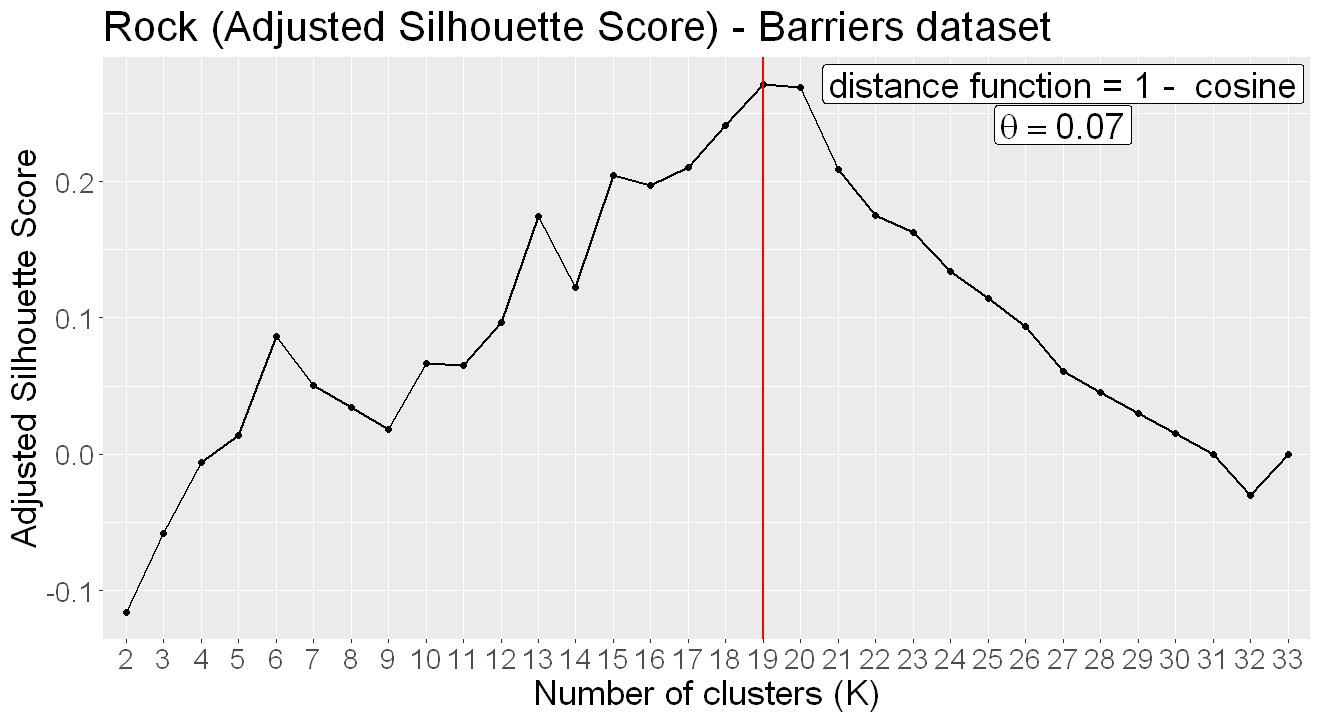

In [14]:
label1 = paste("theta == ", round(best_theta_rock, 2))
label2 =paste('distance function = 1 - ', best_dist_rock)
options(repr.plot.width = 11, repr.plot.height =6)
ggplot(data=scs[(scs$dist == best_dist_rock) & (scs$theta == best_theta_rock), ], aes(x=factor(k), y=scs, group=1)) +
    geom_line(size=0.7) + geom_point(size=1.5) + 
    geom_vline(xintercept = best_K_rock-1, color = "red", size=0.8) + 
    ggtitle("Rock (Adjusted Silhouette Score) - Barriers dataset") +
    xlab('Number of clusters (K)') +
    ylab('Adjusted Silhouette Score') +
    annotate("label", x = 26, y = sil-0.03, parse = TRUE, label=label1, size=7.5) +
    annotate("label", x = 26, y = sil, label=label2, size=7.5) + 
    theme(text = element_text(size = 21)) 


ggsave(path="graphs", file="metric_evolution_barriers_RS.jpeg", width = 11, height = 6)

#### Evaluating the silhuette coefficient for best seed

In [25]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=68)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() + 
#   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

In [26]:
# silhoutte_result <-  silhouette_values(num_clusters=4, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=62)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

In [27]:
# silhoutte_result <-  silhouette_values(num_clusters=3, df=df_during, diss_matrix=dissimilarity_matrix, iters=200, s=13)
# coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
# coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
# coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
# coef_data$clust <- as.factor(coef_data$clust )
# coef_data$ID <- seq.int(nrow(coef_data))

# ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
#   geom_bar(stat = "identity") + 
#   geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
#   coord_flip() + 
#   scale_x_reverse() 

## Exploring Kmodes best k

In [28]:
rockCluster(df_matrix, n=best_K_rock, theta=best_theta_rock, fun = "dist", funArgs = list(method=best_dist_rock))

Clustering:
computing distances ...
computing links ...
computing clusters ...


 data: x 
 beta: 0.9292857 
theta: 0.07071429 
  fun: dist 
 args: list(1) 
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 
 1  2  1  2  2  1  4  2  3  4  2  1  2  1  1  1  1  1  1 

In [29]:
df_during_barriers_dist$cluster <-rockCluster(df_matrix, n=best_K_rock, theta=best_theta_rock, fun = "dist", funArgs = list(method=best_dist_rock))$cl
head(df_during_barriers_dist)

Clustering:
computing distances ...
computing links ...
computing clusters ...


PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard,cluster
1,0,0,0,0,0,1
1,0,1,0,0,0,2
0,0,0,0,1,0,3
1,0,0,0,0,1,4
1,1,0,0,0,0,5
0,0,0,0,0,1,6


In [30]:
joint <- c(
    'PA_barrier_places_closed_dangerous'='PA_barrier_places_closed_dangerous',
    'PA_barrier_money' = 'PA_barrier_money',
    'PA_barrier_no_interest'='PA_barrier_no_interest',
    'PA_barrier_percieve'='PA_barrier_percieve',
    'PA_barrier_time' = 'PA_barrier_time',
    'PA_barrier_hard' = 'PA_barrier_hard'
)

df_during_barriers <- left_join(df_during_barriers, df_during_barriers_dist, by = joint)
df_during$cluster <- df_during_barriers$cluster
df_during_facilitators$cluster <- df_during_barriers$cluster

nrow(df_during_barriers)

[1] 1214

In [31]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
305  22  94 119  27 140  61  13  27  10  58  15  13  25   8 272   1   2   2 

### Profile Plots
<hr />

In [32]:
colors <- c("pink1", "violet", "mediumpurple1", "slateblue1", "purple", "purple3",
        "turquoise2", "skyblue", "steelblue", "blue2", "navyblue",
        "orange", "tomato", "coral2", "palevioletred", "violetred", "red2",
        "springgreen2", "yellowgreen", "palegreen4",
        "wheat2", "tan", "tan2", "tan3", "brown",
        "grey70", "grey50", "grey30")

In [ ]:
create_cluster_histograms(
    colors = colors, 
    df = df_during, 
    names = names(df_during[, 20:ncol(df_during)-1]),
    best_k = best_K_rock
)
create_cluster_histograms(
    colors = colors, 
    df = df_during_facilitators, 
    names = names(df_during_facilitators[, 1:ncol(df_during_facilitators)-1]),
    best_k = best_K_rock
)

#### Mode

In [34]:
modes <- data.frame(matrix(ncol = ncol(df_during_barriers_dist)-1, nrow = 0))
colnames(modes) <- colnames(df_during_barriers_dist)[1:ncol(df_during_barriers_dist)-1]
for( cl in unique(df_during_barriers_dist$cluster)){
    cl_mode <- unname(apply(df_during_barriers_dist[df_during_barriers_dist$cluster == cl, ], 2, modefunc))
    modes[nrow(modes) + 1,] <- cl_mode[1:length(cl_mode)-1]
}

modes

PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard
1,0,0,0,0,0
1,0,1,0,0,0
0,0,0,0,1,0
1,0,0,0,0,1
0,1,0,0,0,0
0,0,0,0,0,1
1,1,0,0,1,1
0,0,1,0,0,1
0,0,1,0,1,1
1,1,1,0,1,1
